In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [12]:
X16_17=np.load('X_16-17.npy',allow_pickle=True)
X16_17=np.swapaxes(X16_17,1,2)
Y16_17=np.load('Y_16_17.npy')


In [122]:
c=2000
X_train=X16_17[12000+c:14000+c,5,:]
X_train=np.expand_dims(X_train,axis=2)
X_train=tf.constant(X_train,dtype=tf.float16)
Y_train=Y16_17[12000+c:14000+c,:]
Y_train=np.squeeze(Y_train)


In [78]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True))
model.add(tf.keras.layers.LSTM(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [126]:
model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(learning_rate=0.00000001),metrics='MAE')

In [127]:
history=model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
63/63 [==============================] - 19s 137ms/step - loss: 9.5034 - MAE: 9.5034
Epoch 2/5
63/63 [==============================] - 9s 145ms/step - loss: 9.5033 - MAE: 9.5033
Epoch 3/5
63/63 [==============================] - 11s 172ms/step - loss: 9.5028 - MAE: 9.50282s - loss: 9.67
Epoch 4/5
63/63 [==============================] - 11s 177ms/step - loss: 9.5028 - MAE: 9.5028
Epoch 5/5
63/63 [==============================] - 12s 184ms/step - loss: 9.5028 - MAE: 9.50284s - loss: 9.6156 - MAE:  - ETA: 3s - loss: 9.6


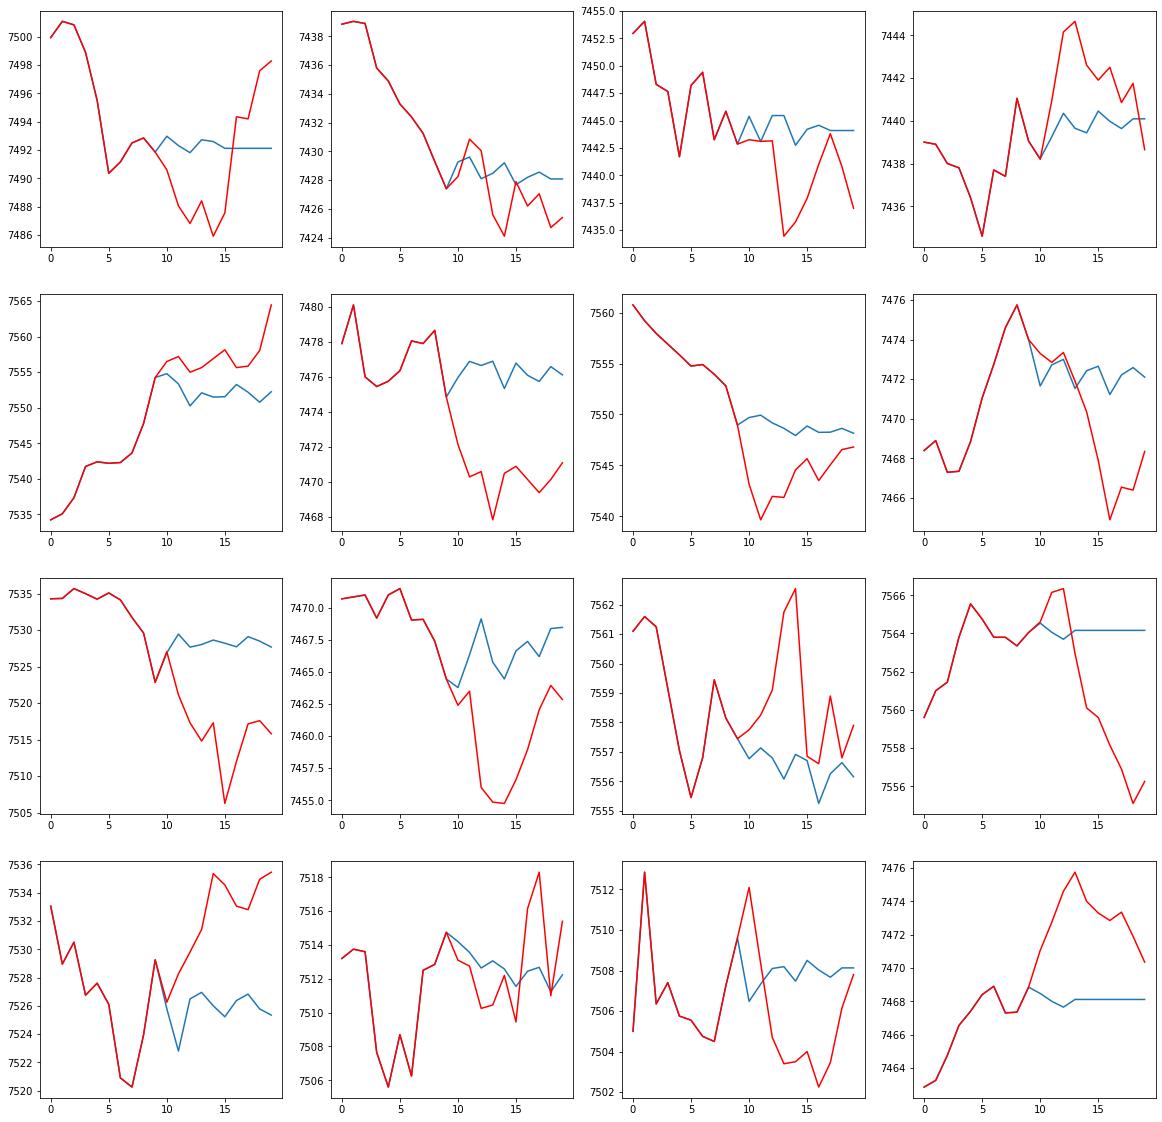

In [77]:
plt.figure(figsize=(20,20))
for j in np.arange(0,16):
    index=np.random.randint(18000,20000)
    X_test=X16_17[index,5,:]
    Y_test=Y16_17[index]
    Y_true=Y16_17[index-10:10+index]
    X_test_predicted=X_test
    X_test_plus_X_test_predicted=X_test
    for i in range(10):
        to_be_appended=model.predict(tf.constant(np.expand_dims(X_test_predicted,axis=[0,2]),dtype=tf.float16))
        X_test_predicted=np.append(X_test_predicted[1:],to_be_appended)
        X_test_plus_X_test_predicted=np.append(X_test_plus_X_test_predicted,to_be_appended)
    plt.subplot(4,4,j+1)
    plt.plot(X_test_plus_X_test_predicted)
    plt.plot(Y_true,c='r')    
